In [ ]:
pip install pocl-binary-distribution

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 17.4 MB/s eta 0:00:00


In [ ]:
pip install pyclesperanto-prototype


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.2/919.2 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 9.8 MB/s eta 0:00:00
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376757 sha256=93435f10088de2639d4d1ccebdb6c7b49cd192462826b172b58fcbebd3de67f8
  Stored in directory: /root/.cache/pip/wheels/06/37/d0/6e0fe02010be074e8138f2b5ffff5254b74751aafb60bb5666
Successfully built transforms3d


In [ ]:
from skimage import io
from skimage.transform import rescale


In [ ]:
import pyclesperanto_prototype as cle


In [ ]:
from matplotlib import pyplot as plt


In [ ]:
from tifffile import imsave, imwrite


In [ ]:
img = io.imread(r'/content/drive/MyDrive/cellpose_inputs/Lateral_line_10-65_8bit.tif')


In [ ]:
print(img)

[[[ 6  6  6 ...  7  7  9]
  [ 6  6  6 ...  7  8  8]
  [ 6  6  6 ...  6  7  7]
  ...
  [ 6  6  6 ...  7  8  6]
  [ 6  7  6 ...  6  8  7]
  [ 6  7  6 ...  7  6  8]]

 [[ 6  6  6 ...  6  7  9]
  [ 6  7  6 ...  7  9  7]
  [ 6  6  6 ...  9  7  9]
  ...
  [ 6  6  6 ...  6  7  7]
  [ 6  6  6 ...  8  7  9]
  [ 6  6  6 ...  7  6  6]]

 [[ 6  6  6 ...  7  8  7]
  [ 6  7  6 ...  7  9  7]
  [ 6  6  6 ... 13  8  7]
  ...
  [ 6  6  6 ...  6  6  6]
  [ 6  6  7 ...  8  6  8]
  [ 6  6  6 ...  8  6  6]]

 ...

 [[ 6  6  6 ...  8  6  6]
  [ 6  6  6 ...  7  7  6]
  [ 6  6  6 ...  6  9  7]
  ...
  [ 8  6  8 ...  6  7  6]
  [ 8  7  7 ...  6  6  6]
  [ 6 10  8 ...  6  6  6]]

 [[ 6  6  6 ...  7  7  6]
  [ 6  6  6 ...  6  6  6]
  [ 6  6  6 ...  8  9  6]
  ...
  [ 9  6  6 ...  6  7  6]
  [ 8  8  7 ...  6  6  6]
  [ 7  8  7 ...  6  6  6]]

 [[ 6  6  6 ...  6  7  6]
  [ 6  6  6 ...  6  6  6]
  [ 6  6  6 ... 10  8  7]
  ...
  [10  7  6 ...  7  6  6]
  [ 8 10  7 ...  7  6  7]
  [ 8  6  8 ...  6  6  7]]]


In [ ]:
print(img.shape) # usually in the format (z, y, x)


(56, 272, 545)


In [ ]:
print("Available OpenCL devices:" + str(cle.available_device_names()))


Available OpenCL devices:['pthread-Intel(R) Xeon(R) CPU @ 2.20GHz', 'cupy backend (experimental)']


In [ ]:
# insert the name of GPU from previous code here
device = cle.select_device('pthread-Intel(R) Xeon(R) CPU @ 2.00GHz')
print("Used GPU: ", device)

Used GPU:  <pthread-Intel(R) Xeon(R) CPU @ 2.20GHz on Platform: Portable Computing Language (2 refs)>


/usr/local/lib/python3.10/dist-packages/pyclesperanto_prototype/_tier0/_device.py:77: UserWarning: No OpenCL device found with pthread-Intel(R) Xeon(R) CPU @ 2.00GHz in their name. Using pthread-Intel(R) Xeon(R) CPU @ 2.20GHz instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


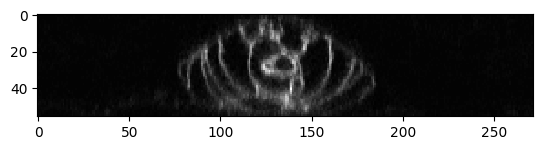

In [ ]:
img_gpu = cle.push(img)
cle.imshow(img_gpu[:,:,250], color_map='gray')

In [ ]:
print(img_gpu)

[[[ 6.  6.  6. ...  7.  7.  9.]
  [ 6.  6.  6. ...  7.  8.  8.]
  [ 6.  6.  6. ...  6.  7.  7.]
  ...
  [ 6.  6.  6. ...  7.  8.  6.]
  [ 6.  7.  6. ...  6.  8.  7.]
  [ 6.  7.  6. ...  7.  6.  8.]]

 [[ 6.  6.  6. ...  6.  7.  9.]
  [ 6.  7.  6. ...  7.  9.  7.]
  [ 6.  6.  6. ...  9.  7.  9.]
  ...
  [ 6.  6.  6. ...  6.  7.  7.]
  [ 6.  6.  6. ...  8.  7.  9.]
  [ 6.  6.  6. ...  7.  6.  6.]]

 [[ 6.  6.  6. ...  7.  8.  7.]
  [ 6.  7.  6. ...  7.  9.  7.]
  [ 6.  6.  6. ... 13.  8.  7.]
  ...
  [ 6.  6.  6. ...  6.  6.  6.]
  [ 6.  6.  7. ...  8.  6.  8.]
  [ 6.  6.  6. ...  8.  6.  6.]]

 ...

 [[ 6.  6.  6. ...  8.  6.  6.]
  [ 6.  6.  6. ...  7.  7.  6.]
  [ 6.  6.  6. ...  6.  9.  7.]
  ...
  [ 8.  6.  8. ...  6.  7.  6.]
  [ 8.  7.  7. ...  6.  6.  6.]
  [ 6. 10.  8. ...  6.  6.  6.]]

 [[ 6.  6.  6. ...  7.  7.  6.]
  [ 6.  6.  6. ...  6.  6.  6.]
  [ 6.  6.  6. ...  8.  9.  6.]
  ...
  [ 9.  6.  6. ...  6.  7.  6.]
  [ 8.  8.  7. ...  6.  6.  6.]
  [ 7.  8.  7. ...  6.  6.  

In [ ]:
import numpy as np


In [ ]:
Checks if the image is 8 bit or 32 bit or 16 bit

SyntaxError: ignored

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
img_gpu.dtype

dtype('float32')

In [ ]:
plt.imshow(img[:,:,818], cmap='Greys_r')    # viewing in yz direction


IndexError: ignored

In [ ]:
plt.imshow(img[:,409,:], cmap='Greys_r')    # viewing in yz direction


IndexError: ignored

In [ ]:
voxelsize_x = 0.10
voxelsize_y = 0.10
voxelsize_z = 0.22

In [ ]:
voxelsize_8bit_x = 0.3
voxelsize_8bit_y = 0.3
voxelsize_8bit_z = 0.3

In [ ]:
img_downscaled = cle.scale(img_gpu, factor_x = voxelsize_x/3, factor_y = voxelsize_y/3, factor_z = voxelsize_z/0.3, auto_size = True)


In [ ]:
img_downscaled_2 = cle.scale(img_gpu, factor_x = voxelsize_8bit_x/1.36, factor_y = voxelsize_8bit_y/1.36, factor_z = voxelsize_8bit_y/1.35, auto_size = True)


In [ ]:
print(img_downscaled_2.shape)

(12, 60, 120)


In [ ]:
type(img_downscaled_2)

pyclesperanto_prototype._tier0._pycl.OCLArray

In [ ]:
img_downscaled.dtype

NameError: ignored

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.minsize)

AttributeError: ignored

In [ ]:
print(img)

[[[ 6  6  6 ...  7  7  9]
  [ 6  6  6 ...  7  8  8]
  [ 6  6  6 ...  6  7  7]
  ...
  [ 6  6  6 ...  7  8  6]
  [ 6  7  6 ...  6  8  7]
  [ 6  7  6 ...  7  6  8]]

 [[ 6  6  6 ...  6  7  9]
  [ 6  7  6 ...  7  9  7]
  [ 6  6  6 ...  9  7  9]
  ...
  [ 6  6  6 ...  6  7  7]
  [ 6  6  6 ...  8  7  9]
  [ 6  6  6 ...  7  6  6]]

 [[ 6  6  6 ...  7  8  7]
  [ 6  7  6 ...  7  9  7]
  [ 6  6  6 ... 13  8  7]
  ...
  [ 6  6  6 ...  6  6  6]
  [ 6  6  7 ...  8  6  8]
  [ 6  6  6 ...  8  6  6]]

 ...

 [[ 6  6  6 ...  8  6  6]
  [ 6  6  6 ...  7  7  6]
  [ 6  6  6 ...  6  9  7]
  ...
  [ 8  6  8 ...  6  7  6]
  [ 8  7  7 ...  6  6  6]
  [ 6 10  8 ...  6  6  6]]

 [[ 6  6  6 ...  7  7  6]
  [ 6  6  6 ...  6  6  6]
  [ 6  6  6 ...  8  9  6]
  ...
  [ 9  6  6 ...  6  7  6]
  [ 8  8  7 ...  6  6  6]
  [ 7  8  7 ...  6  6  6]]

 [[ 6  6  6 ...  6  7  6]
  [ 6  6  6 ...  6  6  6]
  [ 6  6  6 ... 10  8  7]
  ...
  [10  7  6 ...  7  6  6]
  [ 8 10  7 ...  7  6  7]
  [ 8  6  8 ...  6  6  7]]]


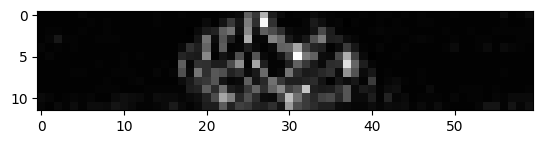

In [ ]:
plt.imshow(img_downscaled_2[:,:,50], cmap='Greys_r')    # viewing in yz direction


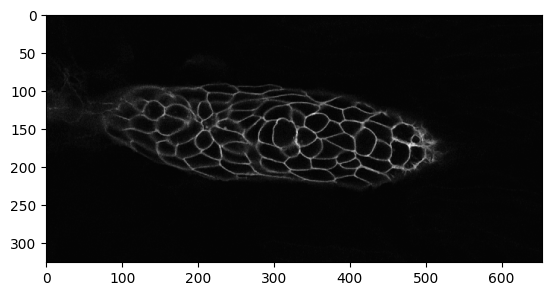

In [ ]:
plt.imshow(img_downscaled_2[46,:,:], cmap='Greys_r')    # viewing in xy direction


In [ ]:
print(img_downscaled.shape)

(24, 82, 164)


In [ ]:
normalized_array = (img_downscaled - img_downscaled.min()) / (img_downscaled.max() - img_downscaled.min())


In [ ]:
scaled_array = (normalized_array * 255.0)


In [ ]:
arr_uint8 = scaled_array.astype(np.uint8)


In [ ]:
img_downscaled_8bit = arr_uint8

In [ ]:
img_downscaled_8bit.dtype

dtype('uint8')

In [ ]:
print(img.shape)

(110, 816, 1636)


In [ ]:
print(img_downscaled_8bit.shape)

(81, 272, 545)


Original image had the shape (110, 816, 1636) and was of resolution 0.1 along the x axis. The new image is isotropic. New image is of shape (81, 272, 545).
For calculating the new resolution solve for the equation 545 = (1636 * 0.1)/new_resolution. Similar calculation for y axis as well. The new resolution is 0.3 as we performed a voxelsize/0.3 calculation

In [ ]:
metadata={'spacing': 0.3 , 'unit': 'um', 'axes': 'ZYX'}
imwrite("/content/drive/MyDrive/downscaled_lat_line_3D_6", img_downscaled_8bit, imagej=True,
        resolution=(1./0.3, 1./0.3), metadata=metadata)